In [1]:
# This line imports pandas, numpy, matplotlib.pyplot, seaborn, and custom function relevant to part 2
%matplotlib widget
from admission_rate import *

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

# Part 2: Gender bias in admission within each major at UC Berkeley in 1973

## **Question 0: Recap**

In Part 1 of this module, we looked at the admission data of UC Berkeley in 1973 and found that 44% of male applicants were admitted while only 35% of female applicants were admitted. This difference is statistically significant, so it is highly unlikely to result from random chance.

In Part 2, we will now dive more deeply into the same admission data by separating applicants by major. Our goal is to find out where this university-wide gender bias in admission comes from. If we can find out which major is most gender biased in its admission process, we can perhaps give the university a more targeted policy recommendation.

As a reminder to Part 1, this is the plot we produced: 

![admission_per_gender_plot](admission_per_gender_plot.png)

**Question 0)** State the conclusion you reached from Part 1, based on the above plot.

*Your Answer Here*

**Instructor Solution:**

- Q0: The two bars differ in height far more than the sizes of their error bars. This means that the difference in acceptance rates of the two genders is statistically significance. That is, it cannot have arisen from chance alone, without any gender bias in the admission process. Without gender bias, we would expect the two bars to be of comparable heights, with a difference smaller than the size of the error bars.

<br/>

<hr style="border: 1px solid #fdb515;" />

## **Question 1: Comprehensive Analysis**

**Question 1.1:** Like last lab, load the *```berkeley.csv```* dataset below.

In [2]:
berkeley = ... # refer back to Part 1 if you're having trouble loading the DataFrame

berkeley

Ellipsis

In [3]:
# Instructor Solution:

berkeley = pd.read_csv('berkeley.csv')

berkeley

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [4]:
# just run this code block

def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts], axis=1)
admissions_by_all.reset_index(inplace=True)

admissions_by_all

,Major,Gender,Accepted,Rejected
0,A,F,89,19
1,A,M,825,313
2,B,F,17,8
3,B,M,353,207
4,C,F,201,392
5,C,M,120,205
6,D,F,131,244
7,D,M,138,279
8,E,F,94,299
9,E,M,53,138


**Question 1.2:** Using the `admissions_by_all` DataFrame provided above, calculate the total applicants and acceptance rate for each combination of major and gender. For clarity, your DataFrame should have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Your resulting DataFrame should resemble the table below:</i> <br> <br>
![admissions_by_all_output](admissions_by_all_output.png)

</details>

In [5]:
admissions_by_all['Counts'] = ...
admissions_by_all['Acceptance Rate'] = ...

admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,Ellipsis,Ellipsis
1,A,M,825,313,Ellipsis,Ellipsis
2,B,F,17,8,Ellipsis,Ellipsis
3,B,M,353,207,Ellipsis,Ellipsis
4,C,F,201,392,Ellipsis,Ellipsis
5,C,M,120,205,Ellipsis,Ellipsis
6,D,F,131,244,Ellipsis,Ellipsis
7,D,M,138,279,Ellipsis,Ellipsis
8,E,F,94,299,Ellipsis,Ellipsis
9,E,M,53,138,Ellipsis,Ellipsis


In [6]:
# Instructor Solution:

admissions_by_all['Counts'] = admissions_by_all['Accepted'] + admissions_by_all['Rejected']
admissions_by_all['Acceptance Rate'] = admissions_by_all['Accepted'] / admissions_by_all['Counts']

admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


Take a look at the acceptance rates for male and female applicants to the same major, say, major B. Notice that they are quite similar to each other. Certainly the gender difference is less pronounced than the 44% vs. 35% for male and female applicants across all majors. How do we know what extent of gender difference in acceptance rates per major can be expected from random chance alone? (Remember we asked this question in part 1 of this module, but for the whole university.) Use the following interactive bar chart, similar to the one you played with in part 1, to answer this question.

**Question** The following bar chart shows what the acceptance rates for female and male applicants would be if we randomly admitted students out of the applicant pool, without regards to their gender. You may drag the sliders (or key in the numbers) to roughly approximate the numbers of applicants and acceptance rate for any particular major, and then click on the button to simulate random admission. Click it many times to see the effect of random chance. For major B, what is the rough range of acceptance rates for female/male applicants should we expect from random chance? Do this also for major D.

*Your Answer Here.*

IntSlider(value=100, continuous_update=False, description='Female applicants', layout=Layout(width='500px'), m…

IntSlider(value=100, continuous_update=False, description='Male applicants', layout=Layout(width='500px'), max…

FloatSlider(value=0.5, continuous_update=False, description='Major acceptance rate', layout=Layout(width='500p…

Button(description='Randomly admit students!', layout=Layout(width='200px'), style=ButtonStyle(), tooltip='Ran…

Output()

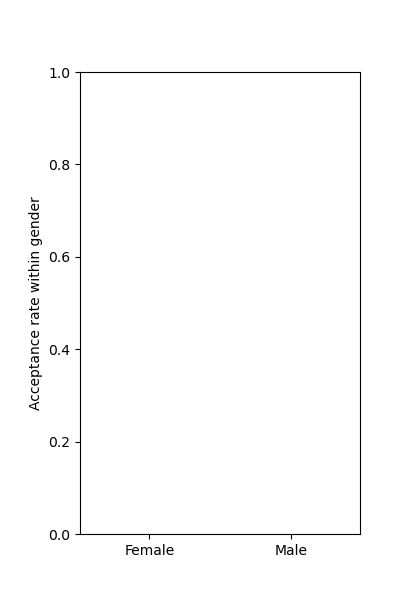

In [7]:
plotMockAdmissionPerMajorWithButton()

Notice again that the female/male acceptance rates may differ simply due to random chance, sometimes by a lot! This random fluctuation depends on the number of applicants for each gender and the overall acceptance rate for each major. Just like in part 1, we can quantify this fluctuation by calculating the standard deviation (roughly 68% confidence interval), which we will then plot as error bars on a per-major-and-gender bar chart.

The following is the same formula we used in part 1 for the standard deviation in the acceptance rate for each major and gender due to chance. Again, you do not need to know the derivation behind it.

$$\operatorname{StDev}(p_{\mathrm{app},A,F}) = \sqrt{\frac{N_{\mathrm{adm}}}{N_{\mathrm{app}}^2} \frac{1-p_{\mathrm{app},A,F}}{p_{\mathrm{app},A,F}}}.$$

Here, $N_{\mathrm{adm}}$ is the total number of admitted students who applied to major A, $N_{\mathrm{app}}$ is the total number of applicants who applied to major A, and $p_{\mathrm{app},A,F}$ is the proportion of female applicants who applied to major A. The standard deviation for the acceptance rate for male applicants who applied to major A is given by the same formula, just with $p_{\mathrm{app},A,M}$ instead of $p_{\mathrm{app},A,F}$.

**Question 1.3:** Your task is to implement this formula for every major-gender combination. To ensure you're on the right track, you should get admission errors of 0.007475 for major A, gender M; and 0.155621 for major B, gender F.

In [ ]:
majors = ... # get all of the unique majors (there should be 6 + "Other")
admission_error = [] # empty list to be populated in the for loop below

for major in majors:
    major_df = ... # this should be a DataFrame including only the current major of the for loop
    N_app = ... # given the major, total number of students who applied (hint: sum over the 'Counts' column of major_df)
    N_adm = ... # given the major, total number of students who were accepted/admitted (hint: sum over the 'Accepted' column of major_df)
    p_app_F = ... # given the major, proportion of students who applied who were female (hint: 
    p_app_M = ... # given the major, proportion of students who applied who were male
    err_F = ... # standard deviation in the acceptance rate for females who applied to some major, implementing the formula above
    err_M = ... # standard deviation in the acceptance rate for males who applied to some major, implementing the formula above
    admission_error.append(err_F)
    admission_error.append(err_M)

admissions_by_all["Admission Error"] = admission_error

admissions_by_all

In [12]:
# Instructor Solution:

majors = admissions_by_all['Major'].unique()
admission_error = []

for major in majors:
    major_df = admissions_by_all[admissions_by_all['Major'] == major]
    N_app = major_df['Counts'].sum()
    N_adm = major_df['Accepted'].sum()
    p_app_F = major_df[major_df['Gender'] == 'F'].reset_index()['Counts'][0] / N_app
    p_app_M = major_df[major_df['Gender'] == 'M'].reset_index()['Counts'][0] / N_app
    err_F = np.sqrt((1 - p_app_F) / p_app_F * (N_adm / N_app**2))
    err_M = np.sqrt((1 - p_app_M) / p_app_M * (N_adm / N_app**2))
    admission_error.append(err_F)
    admission_error.append(err_M)

admissions_by_all["Admission Error"] = admission_error

admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate,Admission Error
0,A,F,89,19,108,0.824074,0.078762
1,A,M,825,313,1138,0.724956,0.007475
2,B,F,17,8,25,0.680000,0.155621
3,B,M,353,207,560,0.630357,0.006947
4,C,F,201,392,593,0.338954,0.014449
5,C,M,120,205,325,0.369231,0.026363
6,D,F,131,244,375,0.349333,0.021838
7,D,M,138,279,417,0.330935,0.019638
8,E,F,94,299,393,0.239186,0.014473
9,E,M,53,138,191,0.277487,0.029780


**Question 1.4:** Construct a `bar` plot that visualizes the admission rates by gender within each major. We recommend using the function `hued_barplot_with_error`, which was imported from `admission_rate.py`.

`hued_barplot_with_error` takes in six arguments: `df`, `x`, `y`, `hue`, `error`, and `title`.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>`df` should be type `pd.Dataframe`. `x`, `y`, `hue`, `error`, and `title` should be type `str`.
- <i>Each `x` variable should be a different major plotting the acceptance rates for the two genders.</i>
- <i>Use the `hue` parameter as a way to differentiate between the two genders.</i>
- <i>Use the `Admission Error` column that was previously calculated for the `error` parameter.</i>

</details>

In [ ]:
...

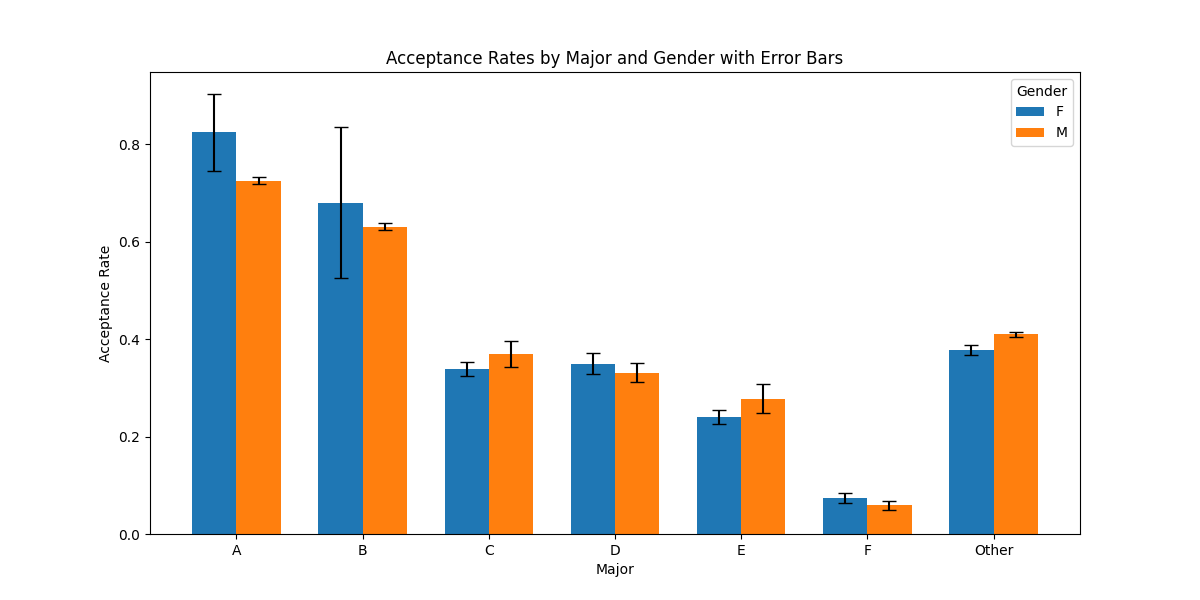

In [14]:
# Instructor Solution:

hued_barplot_with_error(admissions_by_all, 'Major', 'Acceptance Rate', 'Gender', 'Admission Error', 'Acceptance Rates by Major and Gender with Error Bars')

**Question:** For majors B and D, compare the sizes of the error bars with the rough numbers you gave in Question XXX above. Do the sizes match what you observed by eye by clicking the button many times?

**Question 1.5:** In the bar plot above, for each major, do the acceptance rates for male and female applicants differ significantly? That is, do they differ much more than their individual error bars?

**Question 1.6:** How many majors have a gender discrepancy in acceptance rates greater than the error bars? If each error bar represents a 68% confidence interval, how many of the 7 majors do we expect to have a gender discrepancy greater than the error bars just by random chance?

**Question 1.7:** Based on the answers to the previous two questions, is there any statistically significant gender bias in the per-major admission process across the university? That is, do the gender differences in per-major acceptance rates exceed what could be accounted for by random chance alone?

*Your Answer Here*

**Instructor Solution:**

- Q1.5: <u>TODO</u>
- Q1.6: <u>TODO</u>
- Q1.7: <u>TODO</u>

Remember that in Part 1, we concluded that the university's admission process was significantly gender biased, yet we just now concluded that the per-major admission process did not show any significant gender bias. What's going on here? Let's now plot the data in a different way to figure it out!

**Question 1.8:** Construct a `bar` plot comparing the total number of applicants between two genders for each major. For clearer results, first construct a DataFrame `df_without_other`, which is  the `admissions_by_all` DataFrame without the "Other" major. For each bar in the `bar` plot, stack the totals of accepted and rejected applicants. We recommend using the function `stacked_barplot_with_hue`, which was imported from `admission_rate.py`.

`stacked_barplot_with_hue` takes in six arguments: `df`, `x`, `y1`, `y2`, `hue`, and `title`.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>`df` should be type `pd.Dataframe`. `x`, `y1`, `y2`, `hue`, and `title` should be type `str`.
- <i>Each `x` variable should be a different major plotting the stacked accepted and rejected totals for the two genders.</i>
- <i>`y1` and `y2` should be the "Accepted" and "Rejected" columns.</i>
- <i>Use the `hue` parameter as a way to differentiate between the two genders.</i>

</details>

In [9]:
df_without_other = ... # this should be a DataFrame that excludes the "Other" major
...

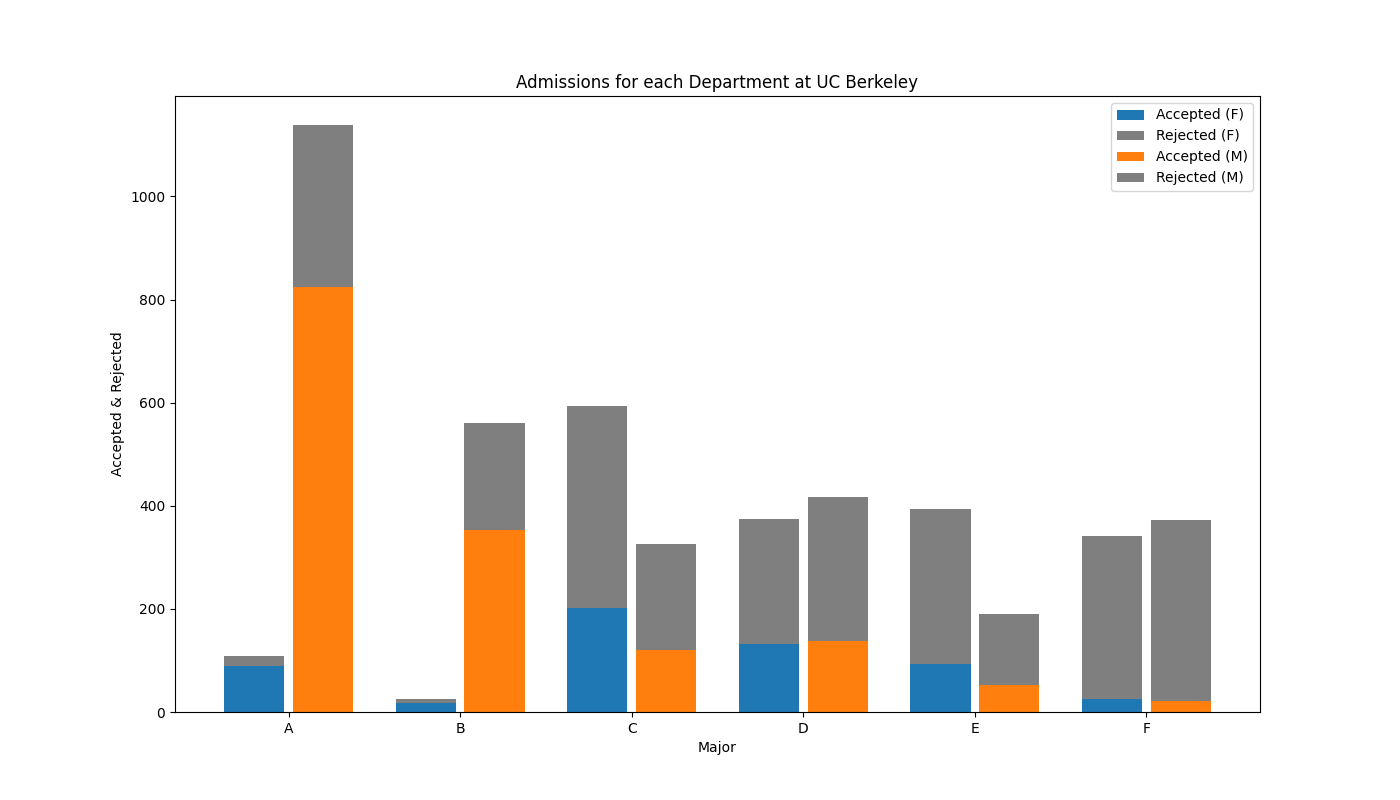

In [16]:
# Instructor Solution:

df_without_other = admissions_by_all[admissions_by_all["Major"] != "Other"]
stacked_barplot_with_hue(df_without_other, "Major", "Accepted", "Rejected", "Gender", "Admissions for each Department at UC Berkeley")

**Question 1.9:** Which two majors are most popular amongst male/female applicants? Are some of these majors "easier" to get in than others?

**Question 1.10:** Based on this, what would you say is the primary source of university-wide gender bias in the admission process?

**Question 1.11:** Recall your policy recommendation based on your conclusions in Part 1. Would you now adjust that policy recommendation in light of the new findings?

*Your Answer Here*

**Instructor Solution:**

- Q1.9: <u>TODO</u>
- Q1.10: <u>TODO</u>
- Q1.11: <u>TODO</u>

<br/>

<hr style="border: 1px solid #fdb515;" />

## **Question 2: Closing Thoughts**

What we just observed is a classic example of [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), a statistical phenomenon where a trend that appears in different groups of data disappears or reverses when these groups are combined. In our case, the groups are the different majors. This paradox is part of a broader set of considerations that need to be made when performing data analysis, as it can drastically change the interpretation of the data and subsequent policy recommendation.

In the following questions, we'll delve further into how phenomena like Simpson's Paradox may pose as an invisible obstacle to comprehensive analysis.

**Question 2.1:** In Part 1, when we looked at all UC Berkeley applicants, we found significant gender bias in the admission process. Suppose a policy was recommended and implemented as a result to equalise the university-wide acceptance rates between male and female. In what ways would such a policy improve fairness between genders? In what ways would it worsen fairness between genders?

*Your Answer Here*

**Instructor Solution:**

- Q2.1: <u>TODO</u>

**Question 2.2:** In Part 2, when we looked at applicants to individual majors, we did not find gender bias in the admission process. Suppose nothing was changed about UC Berkeley's admission process as a result. What positive and negative consequences would you anticipate from this inaction?

*Your Answer Here*

**Instructor Solution:**

- Q2.2: <u>TODO</u>

**Question 2.3:** Of the two methods of analysis (i.e. looking at individual majors or not), which one do you think is "more correct"?

*Your Answer Here*

**Instructor Solution:**

- Q2.3: <u>TODO</u>

There is actually no correct answer to the question above. There are countless ways in which we could've "chopped up" the data into groups. For example, we could've grouped the applicants, not by major, but by the first letter of their surname. Should we make policy recommendations if we found a bias against male applicants with D names?

At the end, Simpson's Paradox tells us that the choice of data grouping involves a values judgment—we may deem separation by majors as more important than separation by first letter of their surname. To make a decision, we must consider the impact of this choice, as in questions 3.1 and 3.2. As diligent data analysts, we must be aware of this often implicit values decision when we dive into a dataset.

**Question 2.4 (Self-reflection):** When you reached the end of Part 1, was the conclusion of gender bias what you expected of UC Berkeley in 1973? How did that make you feel? Did this feeling motivate you to dive deeper into the dataset, or to quickly announce it to the world?

*Your Answer Here*

**Instructor Solution:**

- Q2.4: <u>TODO</u>

<br/>

<hr style="border: 1px solid #fdb515;" />

This is the end of the notebook! Great work!

          /\\_/\\      
         / o o  \\     
        (   "    ))    
         \\~(*)~//     
          \\~~~//      